<a href="https://colab.research.google.com/github/pranavrajwade/EDA-PValue-Statistics--Airbnb-NYC-/blob/master/Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and data

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('/content/AB_NYC_2019.csv', sep=',')

In [0]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


# Data Processing
- Null Values and other preliminary modifications

In [0]:
 missing = (data.columns[data.isnull().mean() > 0.75])

In [0]:
missing

Index([], dtype='object')

In [0]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
data[(data['last_review'].isnull())].describe().T

,count,mean,std,min,25%,50%,75%,max
id,10052.0,2.257484e+07,1.135563e+07,3647.00000,1.208404e+07,2.337757e+07,3.402092e+07,3.648724e+07
host_id,10052.0,8.068437e+07,8.712593e+07,4632.00000,1.207519e+07,3.979538e+07,1.330001e+08,2.743213e+08
latitude,10052.0,4.073210e+01,5.259792e-02,40.49979,4.069757e+01,4.072887e+01,4.076364e+01,4.091169e+01
longitude,10052.0,-7.395612e+01,4.379568e-02,-74.24285,-7.398476e+01,-7.396017e+01,-7.393988e+01,-7.371690e+01
price,10052.0,1.929190e+02,3.586530e+02,0.00000,7.000000e+01,1.200000e+02,2.000000e+02,1.000000e+04
minimum_nights,10052.0,1.151980e+01,2.920793e+01,1.00000,1.000000e+00,3.000000e+00,1.400000e+01,1.000000e+03
number_of_reviews,10052.0,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
reviews_per_month,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculated_host_listings_count,10052.0,1.479327e+01,5.036364e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,10052.0,1.046605e+02,1.390721e+02,0.00000,0.000000e+00,6.000000e+00,2.142500e+02,3.650000e+02


- For number_of_reviews = 0, we have null values for reviews_per_month and last_review.
- Null values for reviews_per_month column can be replaced with zero.
- Columns like name, host_name have a few null values which can be replaced by 'NA'. 

In [0]:
data['reviews_per_month'].fillna(0, inplace = True)

In [0]:
data['name'].fillna('NA', inplace = True)
data['host_name'].fillna('NA', inplace = True)

In [0]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Overview

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b51c583c8>,
      dtype=object)

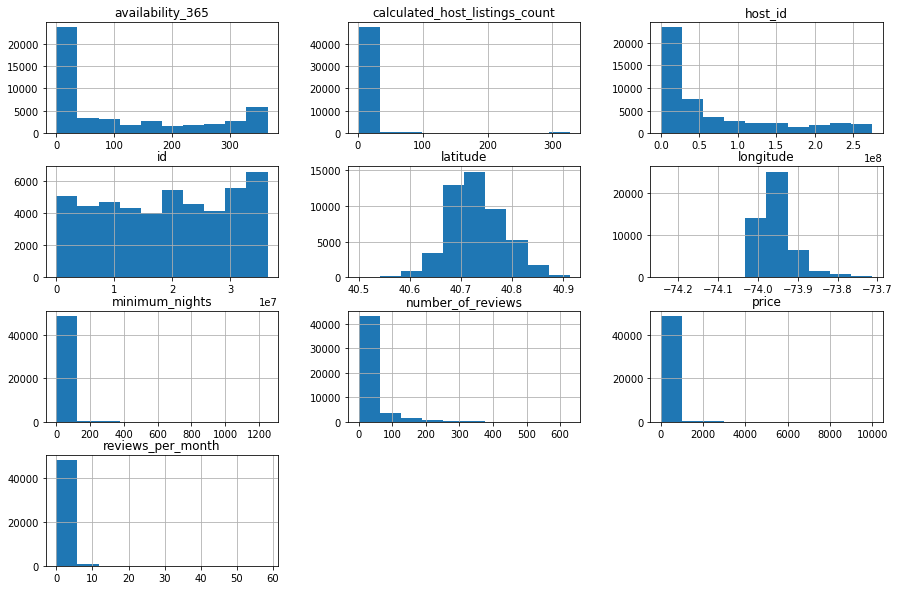

In [0]:
data.hist(figsize=(15,10))

In [0]:
data.corr().style.background_gradient()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.180221,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.209783,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0187577,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.138516,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0505641,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.124905,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.589407,-0.0723761,0.172028
reviews_per_month,0.180221,0.209783,-0.0187577,0.138516,-0.0505641,-0.124905,0.589407,1,-0.0473121,0.163732
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.0473121,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.163732,0.225701,1


# Hosts & Areas

## Top Hosts by number of listings :

In [0]:
hosts = data.groupby(['host_id'])['id'].count()
hosts = hosts.reset_index()
hosts.columns = ['host_id', 'count']
hosts = hosts.sort_values('count', ascending=False)
hosts = hosts.head(10)
hosts

,host_id,count
34646,219517861,327
29407,107434423,232
19574,30283594,121
31079,137358866,103
14436,16098958,96
12806,12243051,96
25662,61391963,91
17091,22541573,87
33868,200380610,65
3044,1475015,52


**NOTE** : The top host has 327 listings. Second and third top hosts are further away from the top by 100 and 200 listings respectively.

## Neighbourhood Group Count

In [0]:
pivot_neighbour = data.groupby(['neighbourhood_group'])['id'].count()
pivot_neighbour = pivot_neighbour.reset_index()
pivot_neighbour.columns = ['neighbourhood_group', 'number_of_listings']

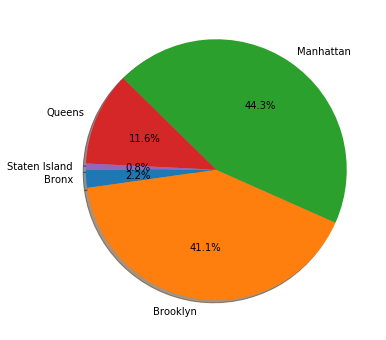

In [0]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1 = plt.pie(pivot_neighbour.number_of_listings, labels=pivot_neighbour.neighbourhood_group, shadow=True, autopct='%1.1f%%',startangle=180)
plt.show()

In [0]:
pivot_neighbour = pivot_neighbour.sort_values('number_of_listings', ascending=False)
pivot_neighbour

,neighbourhood_group,number_of_listings
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


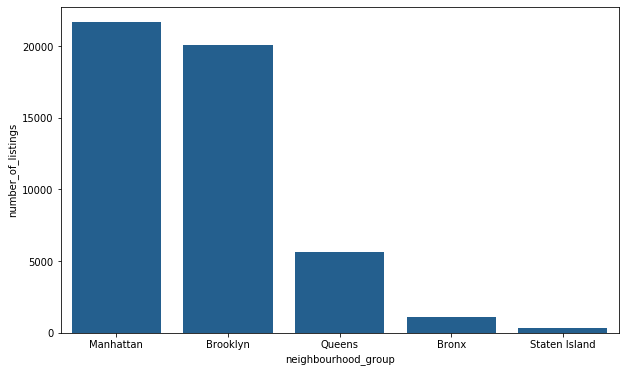

In [0]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x='neighbourhood_group', y='number_of_listings', data = pivot_neighbour, color='#1261A0')

**NOTE** : Manhattan has highest number of listings (21661), closely followed by Brooklyn (20104). 

In [0]:
neighbour_price_ng = data.groupby(['neighbourhood_group'])['price'].mean()
neighbour_price_ng = neighbour_price_ng.reset_index()
neighbour_price_ng.columns = ['neighbourhood_group', 'avg_price']
neighbour_price_ng = neighbour_price_ng.sort_values('avg_price', ascending=False)
neighbour_price_ng.head(10)

,neighbourhood_group,avg_price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


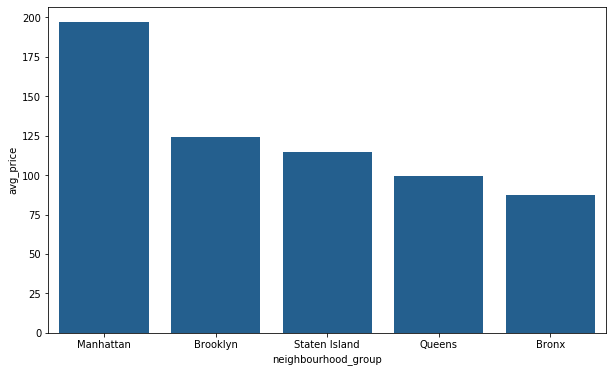

In [0]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(neighbour_price_ng.neighbourhood_group, neighbour_price_ng.avg_price, color='#1261A0')

**NOte** : Manhattan is the costliest neighbourhood by Average Price. 

## Room Type Count

In [0]:
pivot_room = data.groupby(['room_type'])['id'].count()
pivot_room = pivot_room.reset_index()
pivot_room.columns = ['room_type', 'count']
pivot_room = pivot_room.sort_values('count', ascending=False)
pivot_room

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


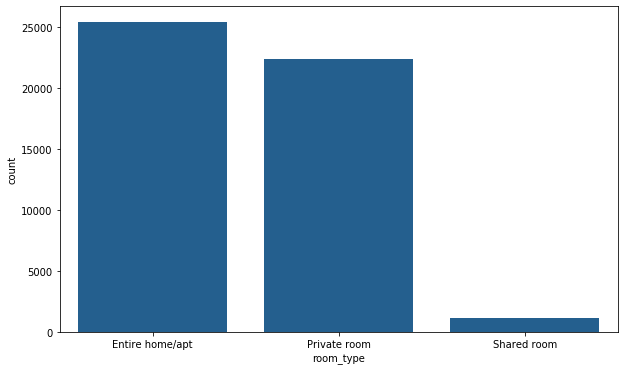

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='room_type', y='count', data = pivot_room, color='#1261A0')

In [0]:
roomtype_price = data.groupby(['room_type'])['price'].mean()
roomtype_price = roomtype_price.reset_index()
roomtype_price.columns = ['room_type', 'avg_price']
roomtype_price = roomtype_price.sort_values('avg_price', ascending=False)
roomtype_price

,room_type,avg_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


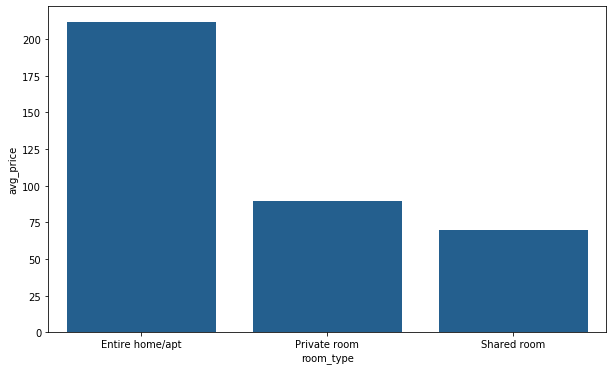

In [0]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(roomtype_price.room_type, roomtype_price.avg_price, color='#1261A0')

**Note** : Entire Home type of listings are highest in count as well as Average Price.
Shared Room are lowest in terms of both count and Average Price.

Both these results are justified, as entire home are easily going to cost more than both shared rooms and private rooms.

## Neighbourhood Group and Room Type

In [0]:
pivot_neighbour_room = data.groupby(['neighbourhood_group', 'room_type'])['id'].count()
pivot_neighbour_room

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: id, dtype: int64

In [0]:

pivot_neighbour_room = pivot_neighbour_room.reset_index()
pivot_neighbour_room.columns = ['neighbourhood_group', 'room_type', 'count']
pivot_neighbour_room = pivot_neighbour_room.sort_values('count', ascending=False)
pivot_neighbour_room

,neighbourhood_group,room_type,count
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


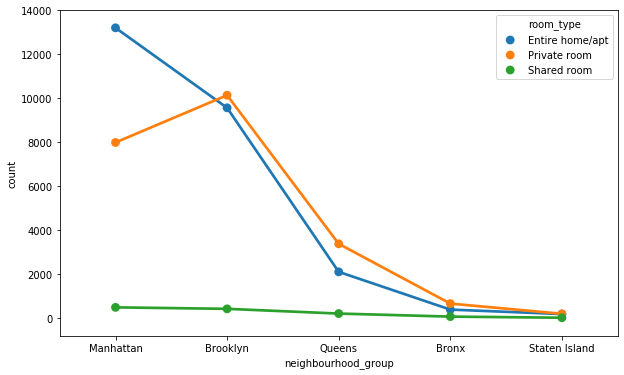

In [0]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.pointplot(x='neighbourhood_group', y='count', hue='room_type', data = pivot_neighbour_room)

Note : Except Manhattan, all other cities exhibit slightly higher numbers of Private Rooms than Entire homes listings.

In [0]:
neighbour_price = data.groupby(['neighbourhood','neighbourhood_group'])['price'].mean()
neighbour_price = neighbour_price.reset_index()
neighbour_price.columns = ['neighbourhood','neighbourhood_group', 'price']
neighbour_price = neighbour_price.sort_values('price', ascending=False)
print('Top 10 Neighbourhoods :')
neighbour_price.head(10)

Top 10 Neighbourhoods :


,neighbourhood,neighbourhood_group,price
82,Fort Wadsworth,Staten Island,800.000000
219,Woodrow,Staten Island,700.000000
197,Tribeca,Manhattan,490.638418
174,Sea Gate,Brooklyn,487.857143
167,Riverdale,Bronx,442.090909
157,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.557143
75,Flatiron District,Manhattan,341.925000
161,Randall Manor,Staten Island,336.000000
144,NoHo,Manhattan,295.717949


In [0]:
print('Bottom 10 Neighbourhoods :')
neighbour_price.tail(10)

Bottom 10 Neighbourhoods :


,neighbourhood,neighbourhood_group,price
135,Mount Eden,Bronx,58.500000
46,Concord,Staten Island,58.192308
88,Grant City,Staten Island,57.666667
142,New Dorp Beach,Staten Island,57.400000
24,Bronxdale,Bronx,57.105263
141,New Dorp,Staten Island,57.000000
179,Soundview,Bronx,53.466667
196,Tremont,Bronx,51.545455
102,Hunts Point,Bronx,50.500000
27,Bull's Head,Staten Island,47.333333


**Notes** : Staten Island boasts most expensive neighbourhood (Fort Wadsworth) by average price but, also has cheapest neighbourhood (Bull's Head). 

## Prices and Reviews

These parameters can give us really interesting insights about the data. Such as :
- Which is the most expensive areas? (Price)
- Which are the best areas? (Reviews)




### Top 10 costly Listings by Average Price :

In [0]:
hosts_price = data.groupby(['id', 'neighbourhood_group'])['price'].mean()
hosts_price = hosts_price.reset_index()
hosts_price.columns = ['id', 'neighbourhood_group', 'price']
hosts_price = hosts_price.sort_values('price', ascending=False)
hosts_price = hosts_price.head(10)
hosts_price

,id,neighbourhood_group,price
9151,7003697,Queens,10000
17692,13894339,Brooklyn,10000
29238,22436899,Manhattan,10000
40433,31340283,Manhattan,9999
12342,9528920,Manhattan,9999
6530,4737930,Manhattan,9999
30268,23377410,Manhattan,8500
4377,2953058,Brooklyn,8000
29662,22779726,Manhattan,7703
42523,33007610,Manhattan,7500


### Top 10 Listings by number_of_reviews :

In [0]:
hosts_review = data.groupby(['id', 'neighbourhood_group'])['number_of_reviews'].mean()
hosts_review = hosts_review.reset_index()
hosts_review.columns = ['id', 'neighbourhood_group', 'number_of_reviews']
hosts_review = hosts_review.sort_values('number_of_reviews', ascending=False)
hosts_review = hosts_review.head(10)
hosts_review

,id,neighbourhood_group,number_of_reviews
11759,9145202,Queens,629
2031,903972,Manhattan,607
2030,903947,Manhattan,597
2015,891117,Manhattan,594
13495,10101135,Queens,576
10623,8168619,Queens,543
1879,834190,Manhattan,540
20403,16276632,Queens,510
4870,3474320,Brooklyn,488
471,166172,Brooklyn,480


# Traffic

## Traffic

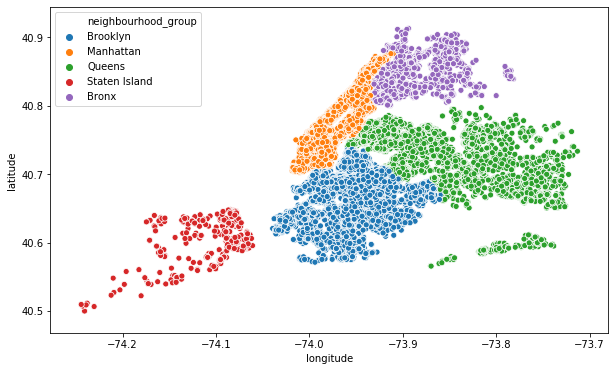

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

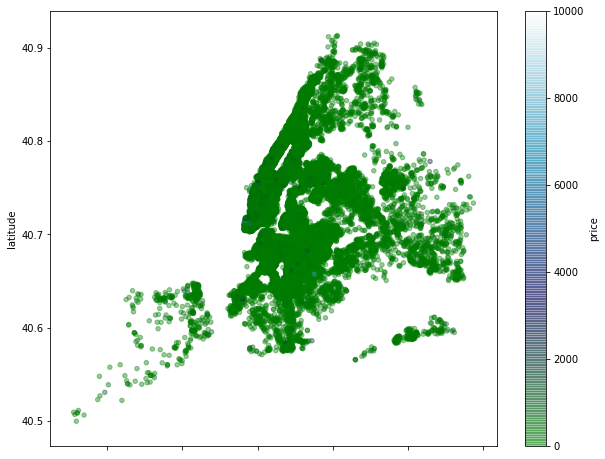

In [0]:
price_visual = data.plot(kind='scatter', x='longitude', y='latitude', c='price',cmap=plt.get_cmap('ocean'), colorbar=True, zorder = 5, alpha=0.4, figsize=(10,8))


**Note** : There is a noticable difference of traffic among certain areas. Places like Brooklyn and Manhatten seem to be quite full of Airbnb listings however, Staten Island shows lesser density.

This can be because of quite a few factors such as, population, importance of place in terms of tourism, universities or businesses etc.

Here we can see a few more data points hiding on the back side. Let's see how the price data is distributed. 

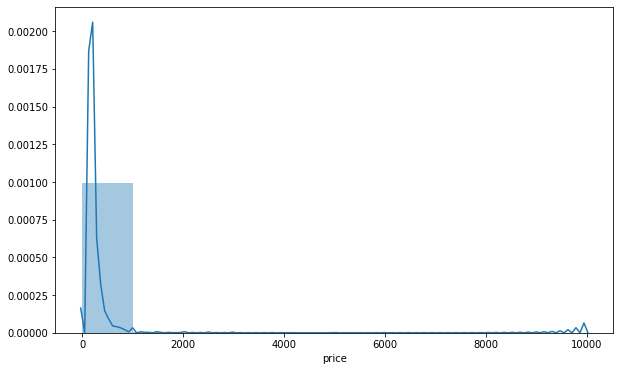

In [0]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.distplot(data.price, bins = 10)

In [0]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

**Note** : Around 75% of data is present between 0 and 175.00. Let us take data upto only 400 to plot and see the results.

## Lower budget Listings

In [0]:
partial_low = data[data.price < 400]

In [0]:
nyc = plt.imread('/content/nyc.png',0)

In [0]:
limits = (data.longitude.min(),data.longitude.max(),
data.latitude.min(),data.latitude.max())
limits

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)

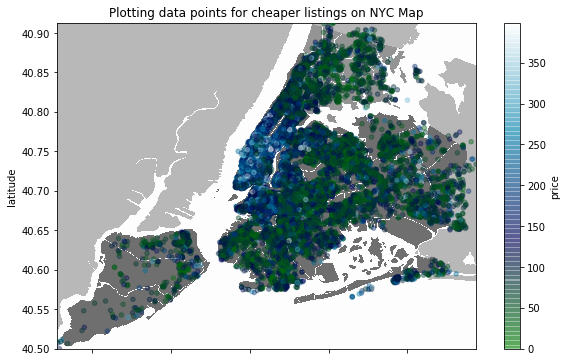

In [0]:
ax= partial_low.plot(x='longitude', y='latitude', c='price', kind='scatter', cmap=plt.get_cmap('ocean'), colorbar=True, alpha=0.4, zorder=5, figsize = (10,6))
ax.set_title('Plotting data points for cheaper listings on NYC Map')
ax.set_xlim(partial_low.longitude.min(),partial_low.longitude.max())
ax.set_ylim(partial_low.latitude.min(),partial_low.latitude.max())

ax.imshow(nyc, zorder=0, extent = limits, aspect= 'equal')

## Higher Budget Listings

In [0]:
partial_high = data[data.price > 400]

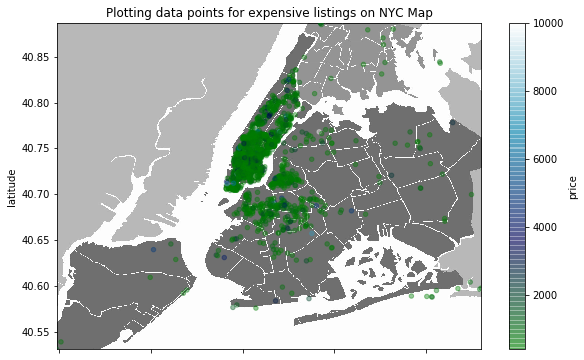

In [0]:
ax= partial_high.plot(x='longitude', y='latitude', c='price', kind='scatter', cmap=plt.get_cmap('ocean'), colorbar=True, alpha=0.4, zorder=5, figsize = (10,6))
ax.set_title('Plotting data points for expensive listings on NYC Map')
ax.set_xlim(partial_high.longitude.min(),partial_high.longitude.max())
ax.set_ylim(partial_high.latitude.min(),partial_high.latitude.max())

ax.imshow(nyc, zorder=0, extent = limits, aspect= 'equal')

**Note** : Manhatten and Brooklyn seem to be having majority of expensive Airbnb listings.

# Predictions and P-Values

In [0]:
data_temp = data

In [0]:
del data_temp['host_id']
del data_temp['id']
del data_temp['host_name']
del data_temp['name']
del data_temp['last_review']
del data_temp['latitude']
del data_temp['longitude']
del data_temp['neighbourhood']

In [0]:
data_temp.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0


In [0]:
data_temp.dtypes

neighbourhood_group                object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [0]:
features = data_temp.select_dtypes(include=['object'])

In [0]:
features = pd.get_dummies(features)
features.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0


In [0]:
del data_temp['neighbourhood_group']
del data_temp['room_type']

In [0]:
data_temp = pd.concat([data_temp, features], axis=1)

In [0]:
X = data_temp.loc[:, data_temp.columns != 'price']

y = data_temp.price

In [0]:
import statsmodels.api as sm
from scipy import stats


X = data_temp.loc[:, data_temp.columns != 'price']

y = data_temp.price

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     456.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:29:40   Log-Likelihood:            -3.3500e+05
No. Observations:               48895   AIC:                         6.700e+05
Df Residuals:                   48883   BIC:                         6.701e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


- Data modelling shows low R-Squared value and low p-value, which indicates that the model is significant but has very less predictive power.

- A lot of parameters such as number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, neighbourhood_group_Bronx, neighbourhood_group_Brooklyn, neighbourhood_group_Manhattan, room_type_Entire home/apt, room_type_Private room, room_type_Shared room are statistically significant.   